# Lab Session 3 

## Using dictionaries, loops and conditionals and sorting. Building frequency lists and analyzing concordances.

### Objectives

* **Dictionaries** - get comfortable creating, getting values and iterating over a dictionary
* **Loops and Conditions** - practice combining a loop over a list (of tokens, sentences, paragraphs, etc) and applying a conditional test on the content
* **Frequency Lists** - Construct a dictionary where the key is a Twitter user and value is a `Counter` object containing a frequency list of the words in their Twitter timeline.




# Setup

In [101]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import random
import os
import csv
import re
import seaborn as sns

from collections import Counter

# Functions

In [102]:
def tokenize(text, lowercase=True, strip_chars=''):
    '''turn a string into a list of whitespace separated tokens - after observing lowercase flag and stripping specified characters
    
    Args:
        text        -- a string object containing the text to be tokenized
        lowercase   -- whether the string should be lowercased before tokenization (default: True)
        strip_chars -- a string containing a series of characters which should be stripped from text before tokenization (default: empty string)
        
    
    Returns:
        list of tokens
    '''
    if lowercase:
        text=text.lower()
        
    rdict = str.maketrans('','',strip_chars)
    text = text.translate(rdict)
        
    tokens=text.split()
    
    return tokens

In [103]:
def get_bigram_tokens(tokens):
    '''crate a list of bigrams from a list of tokens
    
    Args:
        tokens   --  a list of tokens 
        
    Returns:
        list of bigrams
    '''   
    new_tokens = []
    
    for i in range(len(tokens)-1):
        new_tokens.append(" ".join(tokens[i:i+2]))
        
    return new_tokens

In [104]:
def compare_items(dist1, dist2, items, scaling=10000):
    ''' given two Counter objects with common keys compare the frequency and relative frequency of list of items
    
    Args:
        dist1    -- Counter frequency list object
        dist2    -- Counter frequency list object
        items    -- list of string items that should be keys in dist1 and dist2
        scaling  -- normalization factor, e.g. 10,000 words (default: 100000)
    
    Returns:
    
        list of tuples of form
            (item, item_freq_dist1, norm_item_freq_dist1, item_freq_dist2, norm_item_freq_dist2)
    '''
    dist1_size = sum(dist2.values())
    dist2_size = sum(dist2.values())

    item_comparison = []
    
    for item in items:
        
        d1_freq = dist1.get(item,0)
        d2_freq = dist2.get(item,0)
        
        item_comparison.append((item, 
                                d1_freq, d1_freq/dist1_size*scaling,
                                d2_freq, d2_freq/dist2_size*scaling))
    
    return item_comparison
        

In [105]:
def comparison_plot(comparison_data, label1='corpus 1', label2='corpus 2'):
    ''' create a paired barplot of relative frequencies of items in two corpora
    
    Args:
        comparison_data --  list of tuples produced by the compare_items() function
        label1          --  legend label for first corpus (default: corpus 1)
        label2          --  legend label for second corpus (default: corpus 2)
        
    Produces a Seaborn barplot
    '''
    fig = plt.figure(figsize=(12,6))
    
    df=pd.DataFrame(comparison_data)[[0,2,4]] 
    df.columns = ['item', label1, label2]
    df2=df.melt(id_vars=['item'])
    df2.columns=['item', 'corpus', 'frequency']
    sns.barplot(x='item',y='frequency', hue='corpus',data=df2)
    plt.show()

# Dictionaries

* A `dictionary` is an unordered set of **KEY**-**VALUE** pairs
* You can define one with curly braces `{` `}`
* With a pair in the format: `key : value`
* And pairs are separated by commas

In [106]:
celebrity_tweeters = {
    'Chris Pratt': 'prattprattpratt',
    'Mindy Kaling': 'mindykaling',
    'Anna Kendrick': 'AnnaKendrick47',
    'Jimmy Fallon': 'jimmyfallon',
    'Whitney Cummings': 'WhitneyCummings',
    'Kevin Smith': 'thatkevinsmith',
    'Stephen Colbert': 'StephenAtHome',
    'Ellen DeGeneres': 'theellenshow',
    'Chrissy Teigen': 'chrissyteigen',
    'Ryan Reynolds': 'VancityReynolds',
    'Gabby Sidibe': 'GabbySidibe',
    'Kristen Bell': 'IMKristenBell',
    'Olivia Munn': 'oliviamunn',
    "Conan O'Brien": 'ConanOBrien',
    "Shaquille O'Neal": 'SHAQ',
    'Tom Hanks': 'tomhanks'
}

In [107]:
# How many celebs?
len(celebrity_tweeters)

16

* What is _Kevin Smith's_ Twitter ID?

In [108]:
celebrity_tweeters['Kevin Smith']

'thatkevinsmith'

* Keys can be any Python object but are often strings
* They are case and format sensitive, i.e. they must match exactly

In [109]:
celebrity_tweeters['kevin smith']

KeyError: 'kevin smith'

In [110]:
celebrity_tweeters['KevinSmith']

KeyError: 'KevinSmith'

* You'll get a `KeyError` if the dictionary does not have a key matching the index name you give in `[..]` square brackets

In [111]:
celebrity_tweeters['Donald Trump']

KeyError: 'Donald Trump'

* You can also use the `.get()` function which will return either `None` or a default value if there is no key

In [113]:
celebrity_tweeters.get('Donald Trump')   # returns None if key does not exist

In [114]:
celebrity_tweeters.get('Donald Trump','Not in our dictionary') # returns default value you pass if key does not exist

'Not in our dictionary'

In [115]:
# need to escape ' if in a key name
celebrity_tweeters.get('Conan O\'Brien')

'ConanOBrien'

In [116]:
# or use the other string delimiters 
celebrity_tweeters.get("Conan O'Brien")

'ConanOBrien'

* Try:
    * `celebrity_tweeters.keys()`
    * `celebrity_tweeters.values()`
    * `celebrity_tweeters.items()`

### Looping over dictionaries

* We often what to go through all the keys in a dictionary

In [117]:
for key in celebrity_tweeters.keys():
    print('Key is:', key)

Key is: Chris Pratt
Key is: Mindy Kaling
Key is: Anna Kendrick
Key is: Jimmy Fallon
Key is: Whitney Cummings
Key is: Kevin Smith
Key is: Stephen Colbert
Key is: Ellen DeGeneres
Key is: Chrissy Teigen
Key is: Ryan Reynolds
Key is: Gabby Sidibe
Key is: Kristen Bell
Key is: Olivia Munn
Key is: Conan O'Brien
Key is: Shaquille O'Neal
Key is: Tom Hanks


* which is an explicit form of this:

In [118]:
for key in celebrity_tweeters:
    print('Key is:', key)

Key is: Chris Pratt
Key is: Mindy Kaling
Key is: Anna Kendrick
Key is: Jimmy Fallon
Key is: Whitney Cummings
Key is: Kevin Smith
Key is: Stephen Colbert
Key is: Ellen DeGeneres
Key is: Chrissy Teigen
Key is: Ryan Reynolds
Key is: Gabby Sidibe
Key is: Kristen Bell
Key is: Olivia Munn
Key is: Conan O'Brien
Key is: Shaquille O'Neal
Key is: Tom Hanks


In [119]:
for key in celebrity_tweeters:
    print('Key is:', key, 'and the value is:', celebrity_tweeters[key])

Key is: Chris Pratt and the value is: prattprattpratt
Key is: Mindy Kaling and the value is: mindykaling
Key is: Anna Kendrick and the value is: AnnaKendrick47
Key is: Jimmy Fallon and the value is: jimmyfallon
Key is: Whitney Cummings and the value is: WhitneyCummings
Key is: Kevin Smith and the value is: thatkevinsmith
Key is: Stephen Colbert and the value is: StephenAtHome
Key is: Ellen DeGeneres and the value is: theellenshow
Key is: Chrissy Teigen and the value is: chrissyteigen
Key is: Ryan Reynolds and the value is: VancityReynolds
Key is: Gabby Sidibe and the value is: GabbySidibe
Key is: Kristen Bell and the value is: IMKristenBell
Key is: Olivia Munn and the value is: oliviamunn
Key is: Conan O'Brien and the value is: ConanOBrien
Key is: Shaquille O'Neal and the value is: SHAQ
Key is: Tom Hanks and the value is: tomhanks


* A more Pythonic way of doing this is to use `.items()` and get have two named pointers in a `for` loop
* Syntax is:

    ```
    for k, v in dictionary:
        BLOCK OF CODE
    ```
    
  where:
  
     * `dictionary` is the dictionary object you want to iterate over
     * `k` will point to the key of the current item as you walk through the dictionary 
     * `v` will point to the corresponding value

In [120]:
for key, value in celebrity_tweeters.items():
    print('Twitter ID for', key, 'is', value)

Twitter ID for Chris Pratt is prattprattpratt
Twitter ID for Mindy Kaling is mindykaling
Twitter ID for Anna Kendrick is AnnaKendrick47
Twitter ID for Jimmy Fallon is jimmyfallon
Twitter ID for Whitney Cummings is WhitneyCummings
Twitter ID for Kevin Smith is thatkevinsmith
Twitter ID for Stephen Colbert is StephenAtHome
Twitter ID for Ellen DeGeneres is theellenshow
Twitter ID for Chrissy Teigen is chrissyteigen
Twitter ID for Ryan Reynolds is VancityReynolds
Twitter ID for Gabby Sidibe is GabbySidibe
Twitter ID for Kristen Bell is IMKristenBell
Twitter ID for Olivia Munn is oliviamunn
Twitter ID for Conan O'Brien is ConanOBrien
Twitter ID for Shaquille O'Neal is SHAQ
Twitter ID for Tom Hanks is tomhanks


### Task

* Loop over the `celebrity_tweeters` dictionary getting key, value pairs
* Find the celebrities whose Twitter IDs are the same as their names
    * allowing for lowercase
    * stripping space and any punctuation

In [ ]:
for name, twitter_id in celebrity_tweeters.items():
    
    # ADD YOUR CODE HERE

### Task

* Do the same but this time show those who have different Twitter IDs from their names

In [ ]:
for name, twitter_id in celebrity_tweeters.items():
    
    # ADD YOUR CODE HERE

# Loops and conditions

* Here we are going use the text of _The Three Little Pigs_ story split into paragraphs
* And indentify the paragraphs which do/do not contain certain words, e.g. _pig_, _wolf_, _house_

In [122]:
three_pigs_text = open('/data/kids/three_little_pigs.txt').read()

In [123]:
three_pigs_paras= three_pigs_text.split('\n\n')

* Now we have a list of paragraphs

In [124]:
len(three_pigs_paras)

27

In [125]:
three_pigs_paras[0:3]

['Once upon a time there were three little pigs, who left their mummy and daddy to see the world. ',
 "All summer long, they roamed through the woods and over the plains, playing games and having fun. None were happier than the three little pigs, and they easily made friends with everyone. Wherever they went, they were given a warm welcome, but as summer drew to a close, they realized that folk were drifting back to their usual jobs, and preparing for winter. Autumn came and it began to rain. The three little pigs started to feel they needed a real home. Sadly they knew that the fun was over now and they must set to work like the others, or they'd be left in the cold and rain, with no roof over their heads. They talked about what to do, but each decided for himself. The laziest little pig said he'd build a straw hut. ",
 '"It will only take a day,\' he said. The others disagreed. ']

* We can loop over the list of paragraphs and do something with the text at each point
* Here walk through the first 5 paragraphs and print the first 30 characters of each

In [126]:
for para in three_pigs_paras[:5]:
    print(para[:30])

Once upon a time there were th
All summer long, they roamed t
"It will only take a day,' he 
"It's too fragile," they said 
"Clunk! Clunk! Clunk!" It took


* Or, walk through all the paragraphs and print out those that begin with an `A` or `T`

In [127]:
for pig_para in three_pigs_paras:
    
    if pig_para.startswith('A') or pig_para.startswith('T'):
        print(pig_para)
        print()

All summer long, they roamed through the woods and over the plains, playing games and having fun. None were happier than the three little pigs, and they easily made friends with everyone. Wherever they went, they were given a warm welcome, but as summer drew to a close, they realized that folk were drifting back to their usual jobs, and preparing for winter. Autumn came and it began to rain. The three little pigs started to feel they needed a real home. Sadly they knew that the fun was over now and they must set to work like the others, or they'd be left in the cold and rain, with no roof over their heads. They talked about what to do, but each decided for himself. The laziest little pig said he'd build a straw hut. 

The days went by, and the wisest little pig's house took shape, brick by brick. From time to time, his brothers visited him, saying with a chuckle. 

The little pigs rushed home in alarm. Along came the wolf, scowling fiercely at the laziest pig's straw hut. 

The flames 

### Tasks

* Find paragraphs that contain `pig` or `pigs`
* Find paragraphs that contain `wolf`
* Find paragraphs that contain `house`
* Find paragraphs that contain both `pig` (or `pigs`) **AND** `wolf`
* Find paragraphs than contain neither `pig/pigs` or `wolf`


# Twitter frequency lists

In [128]:
pratt=pd.read_csv('/data/celeb_tweets/prattprattpratt.csv')
teigen=pd.read_csv('/data/celeb_tweets/chrissyteigen.csv')
hanks=pd.read_csv('/data/celeb_tweets/tomhanks.csv')

In [129]:
pratt_tweets=list(pratt.text)
teigen_tweets=list(teigen.text)
hanks_tweets=list(hanks.text)

In [130]:
pratt_tweets[:10]

['I’ve been watching you Dad. Ain’t that cool? I’m your buckaroo. I wanna be like you and eat all… https://t.co/aAcA6SBOIH',
 'Island life. https://t.co/BcNisopTRs',
 '\U0001f92f https://t.co/ccSh3m3t9b',
 '65 million years in the making...\n100 days away.\njurassicworld \n#FallenKingdom \nGET READY TO… https://t.co/k3etpA1wOc',
 'Totally candid paparazzi photo of me and @DanaiGurira just hanging out at a coffee shop winds up in the cover of a… https://t.co/XEM6O7VOQ3',
 'Happy #internationalwomensday !! Big ol’ shout out to the women who run my life, dress me, groom… https://t.co/7VkZqoE5gO',
 'Mama snuggles her new baby girl Santa Maria - a healthy, hearty 14lbs! Look at that coat. What a… https://t.co/ZySRgMezR1',
 '#farmlife \n🙏♥️👍🏼\nEwes in the snow.\n#girlpower https://t.co/YGUGxmActj',
 'Praying for you. I will continue to. You inspired me with Clerks when I was a senior HS. I’m tagging my Lb/rb footb… https://t.co/vEy3GZuX3j',
 'Kevin we don’t know each other too good but I hav

In [131]:
teigen_tweets[:10]

['@coconilaa Omg FINALLY a new restaurant!!!!',
 '*vomits* we’ll semi-hard pass, thanks https://t.co/Zorr5vzvKB',
 "dr squats? where's he based? https://t.co/r0Y0tOxITg",
 'jetlag https://t.co/q8IHYXC3o8',
 '@jonrosenberg @steak_umm no I’ve been in the abundance of beef game my whole life. I need to learn to appreciate it',
 '@steak_umm @jonrosenberg I would like to donate my portion of beef to jon',
 '@rachelc46568341 Lol all jokes ❤️',
 '@driverminnie Melon scale!! Good idea! Lol',
 '@rachelc46568341 What did I just say Rachel',
 '@ViitaVee You look beautiful! Hell yeah to 90! Lol']

### Make a frequency list

* As we have done many times now we can use `Counter` object to create a frequency list from a list of tokens

In [132]:
pratt_word_dist = Counter()

for tweet in pratt_tweets:
    
    tokens = tokenize(tweet, lowercase=True, strip_chars="'-!")
    
    pratt_word_dist.update(tokens)

In [133]:
pratt_word_dist.most_common()

[('the', 1289),
 ('i', 949),
 ('rt', 932),
 ('a', 914),
 ('to', 900),
 ('@prattprattpratt', 718),
 ('and', 683),
 ('you', 673),
 ('my', 593),
 ('of', 549),
 ('for', 533),
 ('in', 522),
 ('is', 471),
 ('this', 382),
 ('it', 344),
 ('on', 324),
 ('so', 255),
 ('#fearisntreal', 255),
 ('that', 250),
 ('your', 224),
 ('with', 217),
 ('im', 217),
 ('just', 211),
 ('me', 206),
 ('be', 199),
 ('at', 176),
 ('get', 170),
 ('#helpingjoehenson', 166),
 ('what', 165),
 ('like', 159),
 ('have', 157),
 ('are', 152),
 ('we', 151),
 ('if', 150),
 ('thanks', 144),
 ('do', 141),
 ('was', 140),
 ('its', 140),
 ('all', 139),
 ('love', 137),
 ('but', 134),
 ('got', 134),
 ('out', 130),
 ('good', 130),
 ('see', 129),
 ('one', 126),
 ('up', 122),
 ('great', 121),
 ('not', 118),
 ('from', 118),
 ('go', 113),
 ('thank', 103),
 ('dont', 103),
 ('an', 102),
 ('new', 100),
 ('can', 96),
 ('about', 94),
 ('as', 92),
 ('when', 88),
 ('thats', 87),
 ('shirt', 81),
 ('will', 80),
 ('our', 80),
 ('how', 80),
 ('by', 

In [134]:
len(celebrity_tweeters)

16

* But as we have 16 celebs we want to create frequency lists for we want to use a dictionary with Twitter IDs as keys and the value being a `Counter` object

In [135]:
celeb_tweeters_dist = {}

* Here is doing it for Chris Pratt

In [136]:
for tweet in pratt_tweets:
    
    tokens = tokenize(tweet, lowercase=True, strip_chars="'-!")
    
    try:
        celeb_tweeters_dist['prattprattpratt'].update(tokens)
    except:
        celeb_tweeters_dist['prattprattpratt']=Counter(tokens)

In [137]:
celeb_tweeters_dist['prattprattpratt'].most_common(10)

[('the', 1289),
 ('i', 949),
 ('rt', 932),
 ('a', 914),
 ('to', 900),
 ('@prattprattpratt', 718),
 ('and', 683),
 ('you', 673),
 ('my', 593),
 ('of', 549)]

### Task

* Create frequency lists for Tom Hanks and Chrissy Teigen and add them to the `celeb_tweeters_dist`
* Then you can use the `compare_items()` function to compare two celebs in terms of word usage (or bi- or trigram usage if you want to create those frequency lists as well)
* You can use the `get_bigram_tokens()` function on a list of tokens and then a `Counter` to create a bigram frequency list

# Trump 2019 SOTU

* Do some analysis of the latest State of the Union speech using the techniques we have covered (or others..)
* You can compare to Obama's last (or first) SOTU 
* For example, use 1-, 2-, 3-gram and concordance analysis to explore the way in which the obvious and frequent words like _America_, _people_ and _country_ are being used.
* See if you can do better than this: https://www.yahoo.com/news/trumps-first-state-union-vs-obamas-numbers-060937524.html

In [138]:
trump_sotu = open('/data/SOTU/2019-Trump.txt').read()

In [139]:
print(trump_sotu)

Thank you very much.

Madam Speaker, Mr. Vice President, members of Congress, the First Lady of the United States — and my fellow Americans. We meet tonight at a moment of unlimited potential.

As we begin a new Congress, I stand here ready to work with you to achieve historic breakthroughs for all Americans. Millions of our fellow citizens are watching us now gathered in this great chamber hoping that we will govern not as two parties but as one nation.

The agenda I will layout this evening is not a Republican agenda or a Democrat agenda, it’s the agenda of the American people. Many of us have campaigned on the same core promises to defend American jobs and demand fair trade for American workers.

To rebuild and revitalize our nation’s infrastructure, to reduce the price of health care and prescription drugs, to create an immigration system that is safe, lawful, modern, and secure and to pursue a foreign policy that puts America’s interests first. There is a new opportunity in Americ

In [140]:
for para in trump_sotu.split('\n\n'):
    if para.count('investigation')>0:
        print(para)

Our country is vibrant and our economy is thriving like never before. On Friday, it was announced that we added another 304,000 jobs last month alone — almost double the number expected. An economic miracle is taking place in the United States — and the only thing that can stop it are foolish wars, politics or ridiculous partisan investigations. If there is going to be peace and legislation, there cannot be war and investigation. It just doesn’t work that way!
Today, he leads investigations into the scourge of international sex trafficking. Elvin says: “If I can make sure these young girls get their justice, I've really done my job.” Thanks to his work and that of his incredible colleagues,more than 300 women and girls have been rescued from the horror of this terrible situation and more than 1,500 sadistic traffickers have been put behind bars.


In [141]:
trump_tokens=tokenize(trump_sotu, strip_chars='"!.,-')

In [142]:
trump_word_dist=Counter(trump_tokens)

In [143]:
trump_word_dist.most_common()

[('the', 266),
 ('and', 192),
 ('to', 162),
 ('of', 139),
 ('in', 117),
 ('we', 116),
 ('our', 96),
 ('a', 87),
 ('is', 63),
 ('that', 62),
 ('for', 61),
 ('—', 53),
 ('have', 46),
 ('are', 42),
 ('this', 42),
 ('i', 41),
 ('on', 35),
 ('you', 33),
 ('will', 32),
 ('with', 31),
 ('american', 30),
 ('as', 26),
 ('years', 26),
 ('from', 26),
 ('more', 25),
 ('be', 25),
 ('they', 25),
 ('one', 24),
 ('it', 24),
 ('very', 23),
 ('new', 22),
 ('not', 22),
 ('than', 22),
 ('was', 22),
 ('now', 21),
 ('states', 20),
 ('by', 20),
 ('has', 20),
 ('united', 19),
 ('tonight', 19),
 ('can', 19),
 ('must', 19),
 ('my', 17),
 ('at', 17),
 ('but', 17),
 ('all', 16),
 ('us', 16),
 ('or', 16),
 ('an', 16),
 ('country', 16),
 ('america', 16),
 ('their', 16),
 ('thank', 15),
 ('he', 15),
 ('americans', 14),
 ('also', 14),
 ('who', 14),
 ('time', 14),
 ('last', 13),
 ('border', 13),
 ('women', 13),
 ('congress', 12),
 ('here', 12),
 ('into', 12),
 ('just', 12),
 ('do', 12),
 ('first', 11),
 ('work', 11),


In [144]:
obama2015 = open('/data/SOTU/2015-Obama.txt').read()
obama_tokens = tokenize(obama2015)
obama_dist = Counter(obama_tokens)

In [145]:
comp_items=compare_items(obama_dist, trump_word_dist, 
             items=['chance','make', 'race', 'war', 'class', 'immigration'])

In [146]:
comp_items

[('chance', 3, 5.404431633939831, 3, 5.404431633939831),
 ('make', 23, 41.433975860205365, 7, 12.610340479192939),
 ('race', 1, 1.8014772113132769, 0, 0.0),
 ('war', 3, 5.404431633939831, 6, 10.808863267879662),
 ('class', 0, 0.0, 6, 10.808863267879662),
 ('immigration', 1, 1.8014772113132769, 6, 10.808863267879662)]

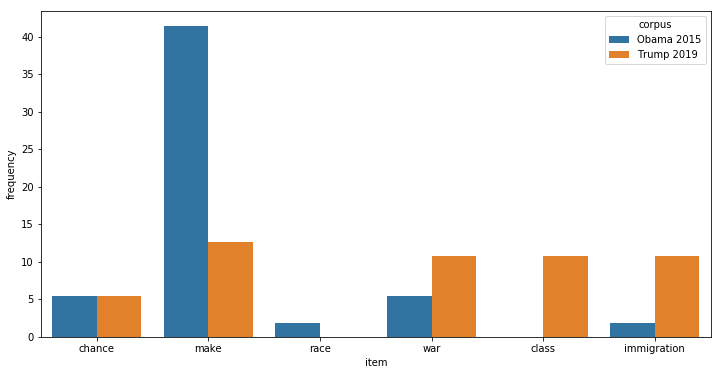

In [147]:
comparison_plot(comp_items,'Obama 2015', 'Trump 2019')

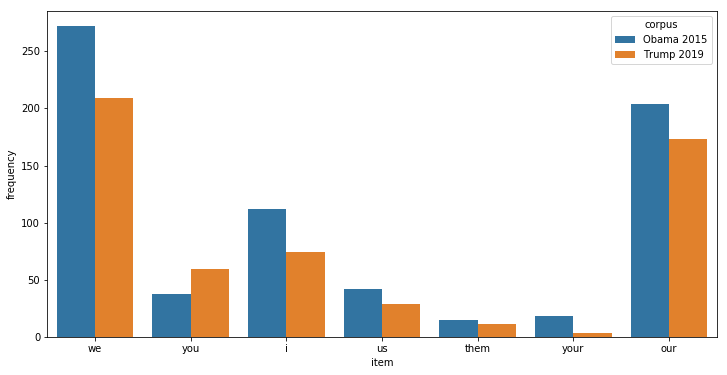

In [148]:
comp_items2=compare_items(obama_dist, trump_word_dist, 
             items=['we','you','i','us','them','your','our'])

comparison_plot(comp_items2,'Obama 2015', 'Trump 2019')

### Looking at bigrams

* Use the `get_bigram_tokens()` function to create a bigram list

In [149]:
trump_bigram_dist=Counter(get_bigram_tokens(trump_tokens))

In [150]:
trump_bigram_dist.most_common()

[('in the', 32),
 ('of the', 22),
 ('we are', 19),
 ('the united', 17),
 ('united states', 17),
 ('— and', 16),
 ('we have', 16),
 ('thank you', 15),
 ('we must', 15),
 ('we will', 13),
 ('and the', 12),
 ('from the', 12),
 ('our country', 11),
 ('one of', 11),
 ('more than', 11),
 ('on the', 10),
 ('is a', 10),
 ('this is', 10),
 ('very much', 9),
 ('and we', 9),
 ('for the', 9),
 ('to be', 9),
 ('you very', 8),
 ('of our', 8),
 ('we can', 8),
 ('my administration', 8),
 ('to our', 8),
 ('is the', 8),
 ('to the', 8),
 ('i am', 8),
 ('the first', 7),
 ('that we', 7),
 ('the world', 7),
 ('at the', 7),
 ('to pass', 7),
 ('a new', 6),
 ('you to', 6),
 ('and to', 6),
 ('over the', 6),
 ('in our', 6),
 ('the time', 6),
 ('southern border', 6),
 ('as we', 5),
 ('i will', 5),
 ('to defend', 5),
 ('the next', 5),
 ('of this', 5),
 ('all of', 5),
 ('together we', 5),
 ('two years', 5),
 ('both parties', 5),
 ('the most', 5),
 ('for a', 5),
 ('will never', 5),
 ('the exact', 5),
 ('whether we',

* Use the loop and filter paradigm to show bigrams where the first word is _we_

In [151]:
for item,freq in trump_bigram_dist.most_common():
    if item.startswith('we '):
        print(item,freq)

we are 19
we have 16
we must 15
we will 13
we can 8
we do 4
we also 2
we passed 2
we work 2
we face 2
we meet 1
we begin 1
we mark 1
we salute 1
we virtually 1
we eliminated 1
we added 1
we always 1
we speak 1
we secure 1
we recently 1
we should 1
we had 1
we agreed 1
we followed 1
we really 1
we can’t 1
we continue 1
we would 1
we stand 1
we condemn 1
we renew 1
we make 1
we tragically 1
we vow 1
we put 1
we represent 1
we be 1
we dare 1
we squander 1
we proudly 1
we defy 1
we conquer 1


* Compare to Obama SOTU addresses and other presidents


* Try other personal pronouns as the first or second item in the bigram
    * `I *`
    * `* you`
    * `* our`
    
    etc